In [39]:
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
df = pd.read_csv("weather.csv")
df["Precipitation (inches)"] = df["Precipitation (inches)"].replace("T","0.0")
df["Precipitation (inches)"] = pd.to_numeric(df["Precipitation (inches)"])
df["Snow (inches)"] = df["Snow (inches)"].replace("T","0.0")
df["Snow (inches)"] = pd.to_numeric(df["Snow (inches)"])
df["Date"] = pd.to_datetime(df["Date"])
print(df.head())

        Date  Maximum Temperature degrees (F)  \
0 2020-01-01                             36.0   
1 2020-01-02                             37.0   
2 2020-01-03                             36.0   
3 2020-01-04                             30.0   
4 2020-01-05                             38.0   

   Minimum Temperature degrees (F)  Precipitation (inches)  Snow (inches)  \
0                             13.0                    0.00            0.0   
1                             31.0                    0.00            0.0   
2                             24.0                    0.00            0.0   
3                             24.0                    0.00            0.0   
4                             24.0                    0.01            0.0   

  Snow Depth (inches)  
0                5.00  
1                5.00  
2                4.00  
3                4.00  
4                4.00  


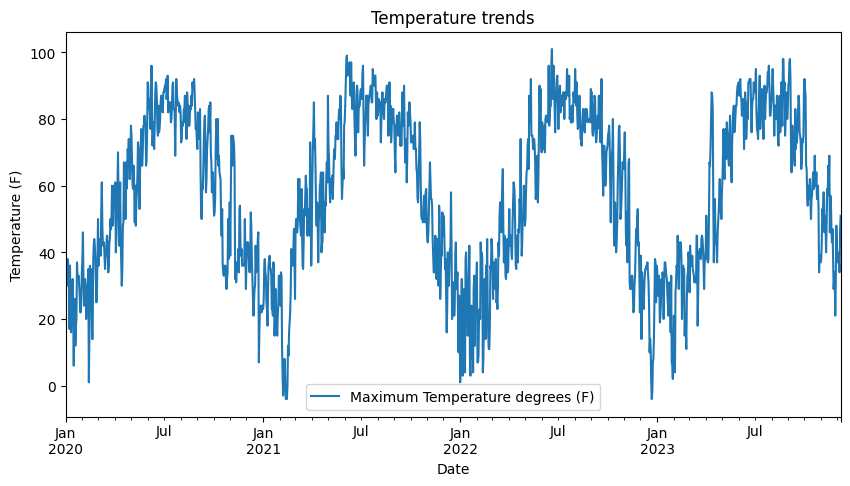

In [41]:
df.plot(x="Date",y="Maximum Temperature degrees (F)", figsize=(10,5))

plt.title("Temperature trends")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.show()

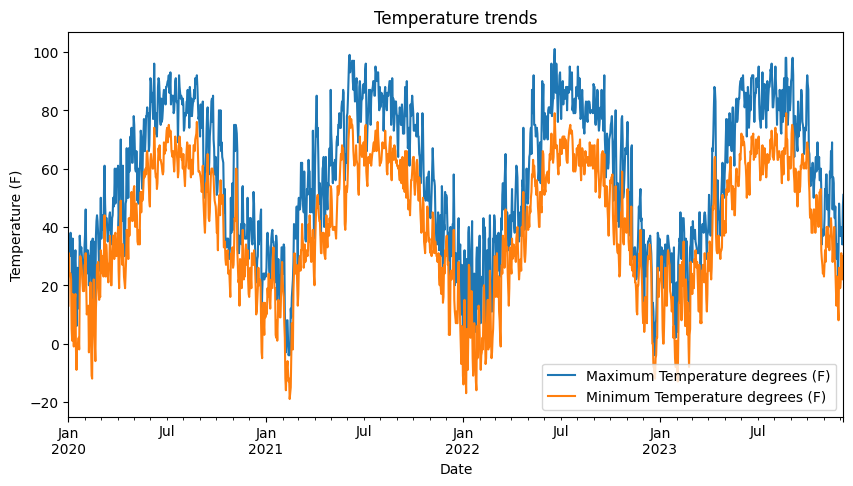

In [42]:
df.plot(x="Date",y=["Maximum Temperature degrees (F)", "Minimum Temperature degrees (F)"], figsize=(10,5))

plt.title("Temperature trends")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.show()

array([[<Axes: title={'center': 'Precipitation (inches)'}>]], dtype=object)

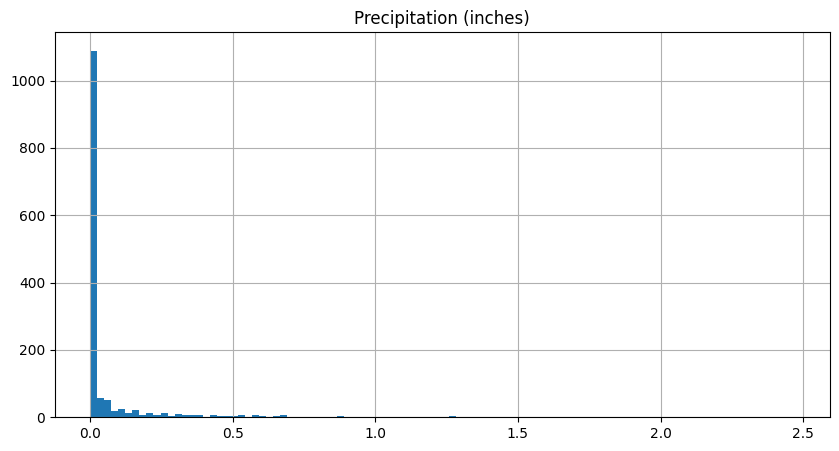

In [43]:
df.hist("Precipitation (inches)",bins=100, figsize=(10,5))

array([[<Axes: title={'center': 'Precipitation (inches)'}>]], dtype=object)

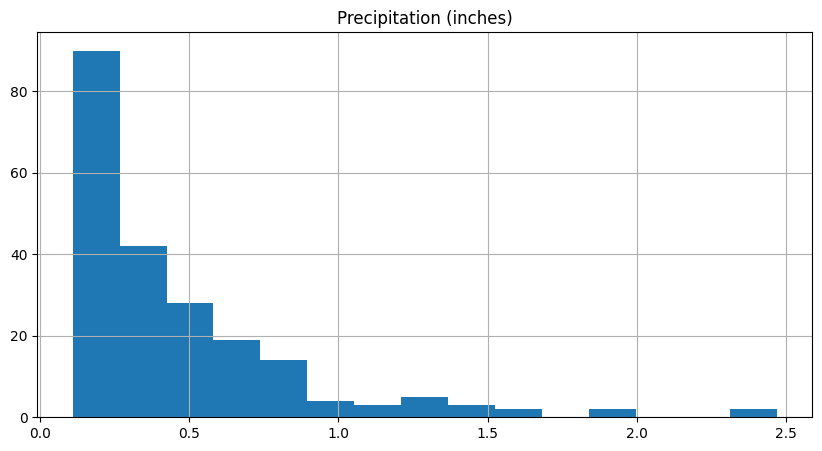

In [44]:
high_precipitation = df[df["Precipitation (inches)"] > 0.1]
high_precipitation.hist("Precipitation (inches)",bins=15, figsize=(10,5))

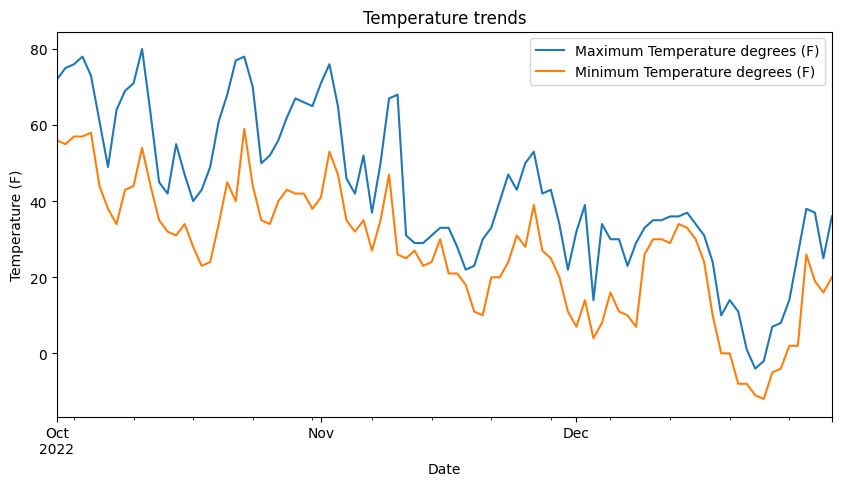

In [45]:
# Oct-Dec, 2020
end_of_2020 = df[ (df["Date"].dt.year == 2022) & (df["Date"].dt.month >= 10) & (df["Date"].dt.month <= 12)]
end_of_2020.plot(x="Date",y=["Maximum Temperature degrees (F)", "Minimum Temperature degrees (F)"], figsize=(10,5))

plt.title("Temperature trends")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.show()


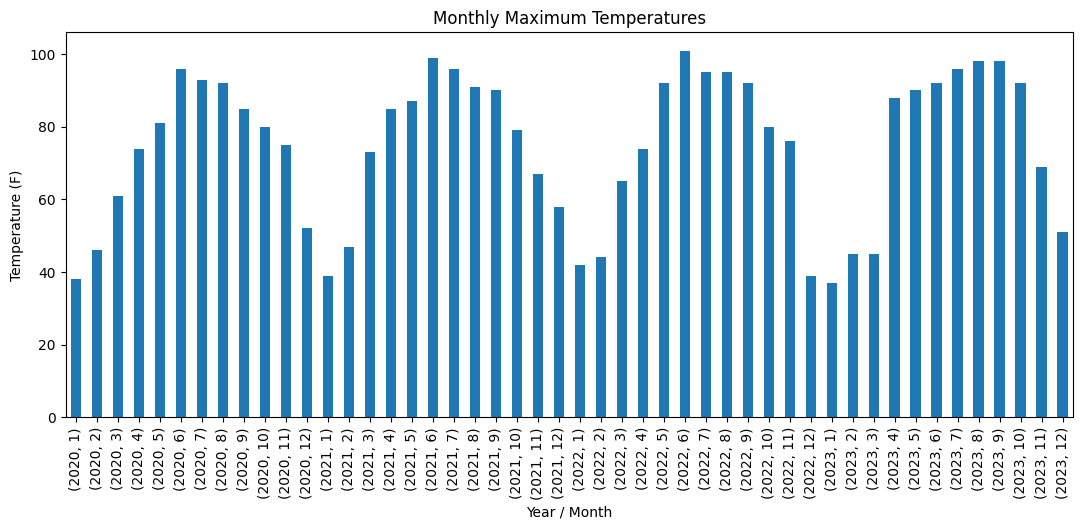

In [46]:
#Maximum temperature in January 2022
# Challenge - using list comprehensions, or another method get the maximum temperature of every month in 2022
monthly_maxs = df.groupby([df["Date"].dt.year, df["Date"].dt.month])["Maximum Temperature degrees (F)"].max()

monthly_maxs.plot.bar(x="Date", y="Maximum Temperature degrees (F)", figsize=(13,5))

plt.title("Monthly Maximum Temperatures")
plt.xlabel("Year / Month")
plt.ylabel("Temperature (F)")
plt.show()

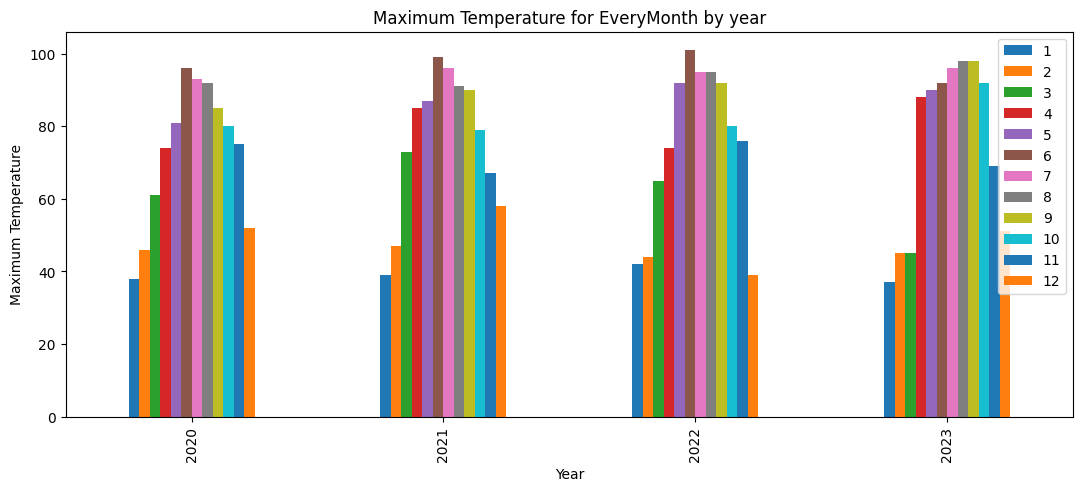

In [70]:
grouped_data=df.groupby([df["Date"].dt.year, df["Date"].dt.month])["Maximum Temperature degrees (F)"].max().unstack()
grouped_data.plot(kind='bar',figsize=(13,5))

plt.xlabel('Year')
plt.ylabel('Maximum Temperature')
plt.title('Maximum Temperature for EveryMonth by year')
plt.legend(loc='upper right')


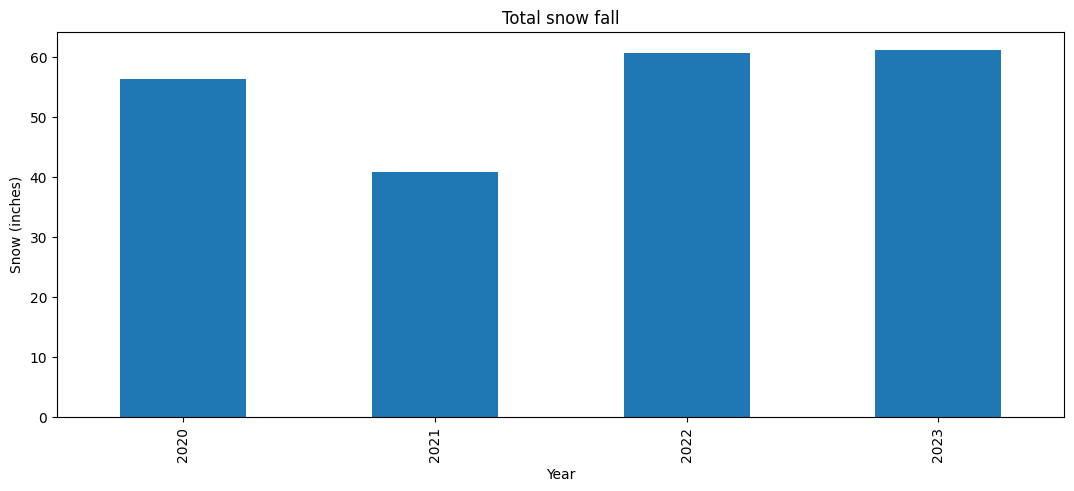

In [47]:
total_snow=df.groupby([df["Date"].dt.year])['Snow (inches)'].sum()
total_snow.plot.bar(x="Date", y="Snow (inches)", figsize=(13,5))
plt.title("Total snow fall")
plt.xlabel("Year")
plt.ylabel("Snow (inches)")
plt.show()

Text(0.5, 1.0, 'Box Plot of Maximum Temperatures')

<Figure size 1500x600 with 0 Axes>

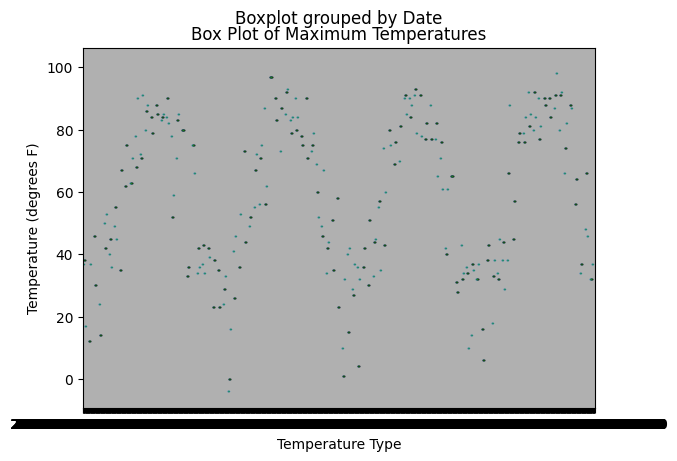

In [72]:
data=df.groupby([df["Date"].dt.year, df["Date"].dt.month])["Maximum Temperature degrees (F)"].median().unstack()
plt.figure(figsize=(15, 6))
df.boxplot(by ='Date', column =["Maximum Temperature degrees (F)"]) 

# Add labels and title
plt.xlabel("Temperature Type")
plt.ylabel("Temperature (degrees F)")
plt.title("Box Plot of Maximum Temperatures")
